In [46]:

import matplotlib.pyplot as plt
# 去这个网站下载文件。https://www.kaggle.com/competitions/dogs-vs-cats/data

import numpy as np
import torch
from PIL import Image
import math
from glob import glob
from torch.nn import Linear


In [12]:
import os

path = '/Users/yundong.zhang/Downloads/dogs-vs-cats/'
files = glob(os.path.join(path, '*/*.jpg'))
print(f'Total no of image {len(files)}')

no_of_images = len(files)

shuffle = np.random.permutation(no_of_images)

os.mkdir(os.path.join(path, 'valid'))

for t in ['train', 'valid']:
    for folder in ['dog/', 'cat/']:
        os.mkdir(os.path.join(path, t, folder))

for i in shuffle[:2000]:
    folder = files[i].split('/')[-1].split('.')[0]
    image = files[i].split('/')[-1]
    os.rename(files[i], os.path.join(path, 'valid', folder, image))

for i in shuffle[2000:]:
    folder = files[i].split('/')[-1].split('.')[0]
    image = files[i].split('/')[-1]
    os.rename(files[i], os.path.join(path, 'train', folder, image))

Total no of image 25000


In [18]:

from torchvision import transforms

simple_transform = transforms.Compose([transforms.Resize((224, 224)), transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])


In [19]:
from torchvision.datasets import ImageFolder

train = ImageFolder(path + 'train', simple_transform)
valid = ImageFolder(path + 'valid', simple_transform)

TypeError: unsupported operand type(s) for -: 'dict' and 'dict'

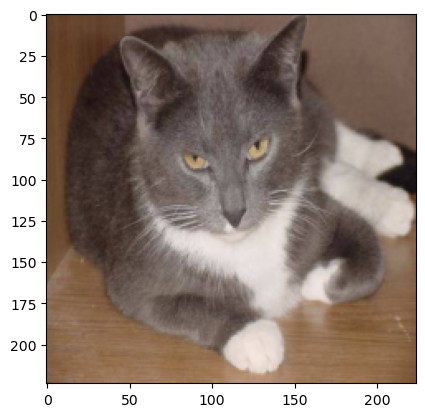

In [24]:
import matplotlib.pyplot as plt


def imshow(inp):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)


imshow(train[50][0])

In [25]:
train_data_gen = torch.utils.data.DataLoader(train, batch_size=64, num_workers=3)
valid_data_gen = torch.utils.data.DataLoader(train, batch_size=64, num_workers=3)

In [32]:
from torch import nn
from torchvision import models

model_ft = models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, 2)
is_cuda = torch.cuda.is_available()
if is_cuda:
    model_ft = model_ft.cuda()

In [38]:
from torch import optim
from torch.optim import lr_scheduler

learning_rate = 0.001
criterion = nn.CrossEntropyLoss()
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [49]:
from tkinter import Variable
import time
import torch.utils.data
from torch.utils.data import DataLoader

def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()
    best_model_wts = model.state_dict()
    best_acc = 0.0
    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        for phase in ['train', 'valid']:
            if phase == 'train':
                scheduler.step()
                model.train(True)
            else:
                model.train(False)

            running_loss = 0.0
            running_corrects = 0
            for data in dataloaders[phase]:
                inputs, labels = data

                if is_cuda:
                    inputs = Variable(inputs.cuda())
                    labels = Variable(inputs.cuda())
                else:
                    inputs, labels = Variable(inputs), Variable(labels)

                optimizer.zero_grad()

                outputs = model(inputs)
                _, preds = torch.max(outputs.data, 1)
                loss = criterion(outputs, labels)

                if phase == 'train':
                    loss.backward()
                    optimizer.step()

                running_loss += loss.data[0]
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))

            if phase == 'valid' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = model.state_dict()
        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Beat val Acc: {:4f}'.format(best_acc))
    
    model.load_state_dict(best_model_wts)
    return model
        

In [50]:
train_model(model_ft,criterion,optimizer_ft,exp_lr_scheduler)

Epoch 0/24
----------


/Users/yundong.zhang/anaconda3/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:139: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


NameError: name 'dataloaders' is not defined